<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-6-1)
 - (https://bit.ly/hg-5-2)
 - (https://bit.ly/hg-5-3)
 
 
 
 # Chapter06. 비지도 학습 ( 비슷한 과일끼리 모으자!)
 
 - 학습목표
     - 타깃이 없는 데이터를 사용하는 비지도 학습과 대표적인 알고리즘을 소개한다.
     - 대표적인 군집 알고리즘인 k-평균과 DBSCAN을 배운다.
     - 대표적인 차원 축소 알고리즘인 주성분 분석(PCA)을 배운다.
     
## 06-1 군집 알고리즘

- 핵심키워드
    - 비지도 학습
    - 히스토그램
    - 군집
    - 흑백 사진을 분류하기 위해 여러가지 아이디어를 내면서 비디도 학습과 군집 알고리즘에 대해 이해한다.
    
#### 문제 상황

고객이 과일 사진을 보내면 그중 가장 많이 요청하는 과일을 판매 품목으로 선정하려 한다. 또 1위로 선정된 과일 사진을 보낸 고객 중 몇 명을 뽑아 이벤트 당첨자로 선정할 것이다. 그런데 고객이 올린 사진을 사람이 하나씩 분류하기는 어렵다. 그렇다고 생선처럼 미리 과일 분류기를 훈련하기에는 고객들이 어떤 과일 사진을 보낼지 알 수 없으니 곤란하다. 사진에 대한 정답(타깃)을 알지 못하는데 어떻게 이 사진을 종류대로 모을 수 있을까?

### 타깃을 모르는 비지도 학습

타깃을 모르는 사진을 종류별로 분류하려 한다. 이렇게 타깃이 없을 때 사용하는 머신러닝 알고리즘이 있다. 바로 **비지도 학습 unsupervised learning** 이다. 사람이 가르쳐 주지않아도 데이터에 있는 무언가를 학습하는 것이다. 

"사진의 픽셀값을 모두 평균 내면 비슷한 과일끼리 모이지 않을까?"

"글쎄요. 확신할 수는 없지만 해 봐야 알 것 같다."

"모델을 만들기 위해 개발 팀에서 사진 300장을 받아 놨네. 같이 고민해 보자고."

그럼 데이터를 준비하고 픽셀값을 이용해서 사진을 분류해보겠다.

### 과일 사진 데이터 준비하기

데이터는 사과, 바나나, 파인애플을 담고 있는 흑백 사진이다. 이 데이터는 넘파이 배열의 기본 저장 포맷인 npy 파일로 저장되어있다. 넘파이에서 이 파일을 읽으려면 먼저 코랩으로 다운로드해야한다. 코랩에서 다음 명령을 실행해 파일을 다운로드 하자.

- 이 과일 데이터는 캐글에 공개된 데이터셋 이다. https://www.kaggle.com/moltean/fruits



In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-05-27 19:05:32--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-05-27 19:05:33--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-05-27 19:05:33--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

그럼 이 파일에서 데이터를 로드하겠다. 먼저 넘파이와 맷플롯립 패키지를 임포트 하자.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

넘파이에서 npy 파일을 로드하는 방법은 아주 간단하다. load() 메서드에 파일 이름을 전달하는 것이 전부다

In [5]:
fruits = np.load('fruits_300.npy')

fruits는 넘파이 배열이고 fruits_300.npy 파일에 들어 있는 모든 데이터를 담고 있다. fruits 배열의 크기를 확인 하겠다.

In [6]:
print(fruits.shape)

(300, 100, 100)


이 배열의 첫 번째 차원(300)은 샘플의 개수를 나타내고, 두 번째 차원(100)은 이미지 높이, 세 번째 차원(100)은 이미지 너비이다. 이미지 크기는 100 x 100 이다. 각 픽셀은 넘파이 배열의 원소 하나에 대응한다. 즉 배열의 크기가 100 x 100 이다.

첫 번째 이미지의 첫 번째 행을 출력하겠다. 3차원 배열이기 때문에 처음 2개의 인덱스를 0으로 지정하고 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자를 씀면 첫 번째 이미지의 첫 번째 행을 모두 선택 할 수 있다.

In [7]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


첫 번째 행에 있는 픽셀 100개에 들어 있는 값을 출력했다. 이 넘파이 배열은 흑백 사진을 담고 있으므로 0~255까지의 정숫값을 가진다. 이 정숫값에 대해 조금 더 설명하기 전에 먼저 첫 번째 이미지를 그림으로 그려서 이 숫자와 비교해 보자.

맷플롯립의 imshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를 쉽게 그릴 수 있다. 흑백 이미지이므로 cmap 매개변수를 'gray'로 지정한다.

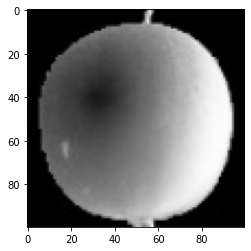

In [8]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

첫 번째 이미지는 사과 같다. 다음의 그림 처럼 첫 번째 행이 위에서 출력한 배열 값에 해당한다. 0에 가까울 수록 검게 나타나고 높은 값은 밝게 표시된다.